In [1]:
import sys  
sys.path.insert(0, '../..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits, fetch_covtype    
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import adjusted_rand_score as ARI
from rock import ROCK

import matplotlib.pyplot as plt

import logging
import sys
from tqdm.notebook import tqdm

In [4]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

In [5]:
experiment = []
run_id = 0

In [6]:
seed = 0
datasets = []
for s in range(seed, seed+10):
      datasets.append(make_moons(n_samples=1000, noise=0.15,
            shuffle=True, random_state=s))

In [7]:
tmaxs = range(0, 30)

In [8]:
for t in tqdm(range(0, len(tmaxs))):
  for d in tqdm(range(0, len(datasets))):
      dataset = datasets[d]
      run = {}
      scaler = StandardScaler()
      data = scaler.fit_transform(dataset[0])
      rock = ROCK(tmax=tmaxs[t]).fit(data).labels_
      gt = dataset[1]
      run['AMI'] = AMI(rock, gt)
      run['ARI'] = ARI(rock, gt)
      run['tmax'] = tmaxs[t]

      experiment.append(run)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
results = pd.DataFrame(experiment)

In [10]:
results.to_csv('../../results/optimization/ROCK_Moon_hypersearch.csv')

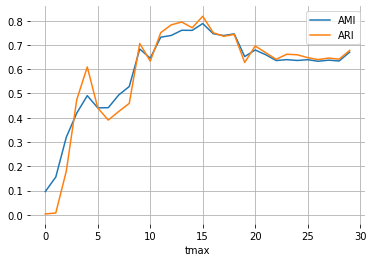

In [11]:
import matplotlib.pyplot as plt
results.groupby('tmax').mean().plot()
plt.savefig('Rock_moon_hypersearch_scaled.png')

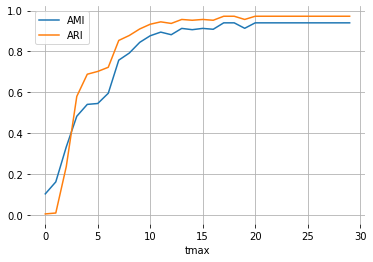

In [12]:
results.groupby('tmax').max().plot()
plt.savefig('Rock_moon_hypersearch_max.png')

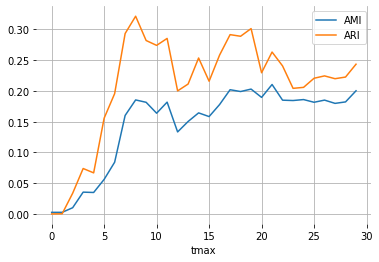

In [13]:
results.groupby('tmax').std().plot()
plt.savefig('Rock_moon_hypersearch_std.png')

The following table shows that Rock's optimal AMI is obtained at $t_{max}$ = 15. 

In [14]:
results.groupby('tmax').mean()

,AMI,ARI
tmax,,
0,0.095797,0.003790
1,0.155898,0.007566
2,0.319799,0.179920
3,0.419308,0.474669
4,0.491158,0.609357
5,0.440662,0.440508
6,0.441496,0.390416
7,0.494020,0.425910
8,0.528716,0.459273


In [16]:
results.groupby('tmax').std()

,AMI,ARI
tmax,,
0,0.002916,0.000370
1,0.002949,0.000599
2,0.010411,0.033884
3,0.035692,0.074031
4,0.035142,0.066964
5,0.056394,0.155702
6,0.084217,0.195490
7,0.160100,0.293013
8,0.185274,0.321030
